<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    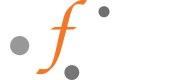
</div>

# A first look at perturbation theory

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 30 min</li>
<li><strong>Exercises:</strong> 5 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>What is perturbation theory?</li>
<li>In what regard is the infinite well a rare case in the world of quantum physics?</li>
<li>How can I apply perturbation theory to find energies?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Understand that we can describe complex systems in terms of simpler ones.</li>
<li>Have a grasp of Dirac notation.</li>
<li>Visualise the effect of a square perturbation on the infinite well.</li>
<li>Understand why a central perturbation affects some quantum states more than others. </li>
</ul>
</div>

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Import-Necessary-Libraries%0A"><i class="fa fa-info-circle"></i> Import Necessary Libraries
</h3>
    <p>For this section, we will be making use of the <code>quad</code> function from the <code>scipy.integrate</code> library to find the values of integrals.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Time-independent non-degenerate perturbation theory

The infinite potential well is one of a few examples of quantum systems which have exact solutions to the Schrödinger equation. However, for the vast majority of systems, approximate solutions must be found using perturbation theory, which is widely regarded as one of the most useful results of quantum mechanics. It uses mathematical methods to describe the Hamiltonian of a complex system in terms of a much simpler one, for which an exact solution has been found. 

It is assumed that the Hamiltonian operator of the complex system can be expressed as 

$$
\hat{H} = \hat{H}_{0} + \hat{H}^{'} \ ,
\tag{1}
$$

where $\hat{H}$ is the Hamiltonian of the simple, 'unperturbed' system. We assume that we know the solutions of $\hat{H}_{0}\bigl|\psi_{0n}\bigl> = E_{0n}\bigl|\psi_{0n}\bigl>.$ That is, we know the eigenvalues and complete set of eigenfunctions belonging to the Hamiltonian $\hat{H}_{0}$. $\hat{H}^{'}$ represents an additional energy term, which acts as a “perturbation” on the system described by $\hat{H}_{0}$. We assume this additional energy term is small in comparison to $\hat{H}_{0}$. $\hat{H}^{'}$ could, for example, describe the effect of a small central square perturbation in the infinite potential well. 

To describe the perturbed system, we look for solutions of $\hat{H}\bigl|\psi_{n}\bigl> = E_{n}\bigl|\psi_{n}\bigl>$ in the form

$$
E_{n} = E_{0n} + \lambda E_{1n} + \lambda^{2}E_{2n} + ...
\tag{2}
$$

$$
\bigl|\psi_{n}\bigl> = \bigl|\psi_{0n}\bigl> + \lambda\bigl|\psi_{1n}\bigl> + \lambda^{2}\bigl|\psi_{2n}\bigl> + ...,
\tag{3}
$$

where $E_{0n}$ and $|\psi_{0n}\bigl>$ are the energy and wavefunction of the unperturbed system. The number in the subscripts of the energies and wavefunctions respresent the order of the corection to the system. For example, $E_{1n}$ represents the first-order correction to the energy. Substituting into the equation and equating powers of $\lambda$ we find solutions of the form,

$$
E_{n} = E_{0n} + \bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl> + \sum_{k\neq n}\frac{\bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0k}\bigl> \bigl<\psi_{0k}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>}{E_{0n} - E_{0k}} + ...
\tag{4}
$$

$$ 
\bigl|\psi_{n}\bigl> = \bigl|\psi_{0n}\bigl> + \sum_{k\neq n}\frac{\bigl<\psi_{0k}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>}{E_{0n} - E_{0k}}\bigl|\psi_{0k}\bigl> + ...
\tag{5}
$$

## An example - Square perturbation in an infinite well
### Energy

Firstly we will consider how perturbation theory can be applied to find the correction to the energy of a system. As an example, we will consider a 1D infinite potential well of width $a$ with a potential 'bump' at its centre, of height $V$ and covering one fifth of the width of the well. Before we investigate the effects of this perturbaion on the energy of the system, we will look at the energy of the 'unperturbed' system, which is described by equation 5 in the first chapter. 

Before we begin, make sure that the `psi` function which we made previously is already in the notebook as we will need it later on. Also ensure that all constants, such as the width of the well, remain because we will be using them again.

Now, we will plot a graph of the energy of the unperturbed system against the principle quantum number, $n$. To do this, we will use a similar approach to that in previous chapters:

- create a function to calculate the energy
- fill an empty array with values of the energy for increasing quantum number, $n$
- generate an array of quantum numbers using the function `linspace`
- plot the two arrays alongside each other

Copy and paste the following functions into your Jupyter notebook and you will see a smooth curve. As expected from the equation for energy, we see that the energy is proportional to the square of the principle quantum number.

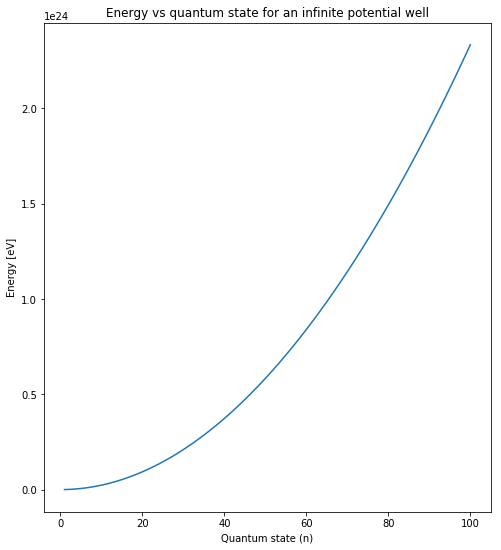

In [2]:
e = 1.6 * 10**(-19) #an electron volt
hbar = 1.05 * 10**(-34) 
m =  9.11 * 10**(-31)

L = 10**(-10) #width of the infinite well
w = 0.2*L #width of the perturbation
Nx = 100 #number of x-positions over which we will sample the wavefunction
xstep = L / Nx #step in x values

nmax = 1000 #number of x-positions over which we will sample the square perturbation. Very high for plotting purposes

Vmax = 1000 * e #the maximum perturbation magnitude we will sample
NV = 10 #number of perturbation magnitudes we will sample
Vstep = Vmax / NV #step in perturbation magnitude

def psi(n, x):
    """
    Computes the value of the n'th wavefunction at a position x, using the analytic solution 
    to the Schrodinger equation for an infinite potential well.
    
    Returns:
        float
            The value of the wavefunction at x
        
    Parameters:
        x : float
            The x coordinate of the system
        
        n : integer
            Describes which state the wavefunction is in
    """
    
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle in joules
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy / e

def energy_spectrum(nmax):
    """
    Function to find energy of the system in eV for various quantum states
    
    Returns:
        E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    E = np.empty(nmax)
    
    for i in range(0, nmax):
        E[i] = energy(i + 1) / e
    
    return E

def plot_energy(nmax):
    """
    Function to plot energy against the quantum state
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
    
        
    #general plot formatting
    ax.plot(n, energy_spectrum(nmax))
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('Quantum state (n)')
    plt.ylabel('Energy [eV]')
    plt.title('Energy vs quantum state for an infinite potential well')
    return plt.show()

plot_energy(100)

Now we want to find the first-order correction to the energy of the system. We will use equation 4, and therefore we need to know the wavefunction of the unperturbed system, which we have found previously as

$$
\psi_{0n}(x) = \sqrt\frac{2}{a}\sin\biggl(\frac{n\pi x}{a}\biggl).
\tag{6}
$$

From equation 4, we know that the first-order correction to the energy of the system is $E_{1n} = \bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl>$. Dirac notation is very confusing when first encountered so we will write this equation in a simpler form

$$
\bigl<\psi_{0n}\bigl|\hat{H}^{'}\bigl|\psi_{0n}\bigl> = \int_{x}\psi^{*}V\psi dx,
\tag{7}
$$

where $\psi^{*}$ is the complex conjugate of the wavefunction. Substituting equation 6 into here we find

$$
E_{1n} = \frac{2}{a} \int_{0.4a}^{0.6a}\sin\biggl(\frac{n\pi x}{a}\biggl)V\sin\biggl(\frac{n\pi x}{a}\biggl)dx
\tag{8}
$$

$$
E_{1n} = V \biggl(0.2 - \frac{\sin(1.2n\pi) - sin(0.8n\pi)}{2n\pi}\biggl)
\tag{9}
$$

We will now write some lines of code to illustrate the meaning of this equation in real terms. Below is a codeblock containing three functions, which relate to each other to calculate the first-order correction to the energy and then plot the new energy over a range of quantum states with a plot of the unperturbed energy for comparison. Make sure to keep all previous code blocks in your Jupyter notebook when you copy this code because it utilises the previously-declared functions. 

You will notice that there is a function within the first function, which defines the integrand. This is because the `quad` function, only integrates function with only one argument, which in this case is the x-position. Note also that the `quad` function has two outputs contained in a list - the value of the integral and the estimated absolute error in the value of the integral.

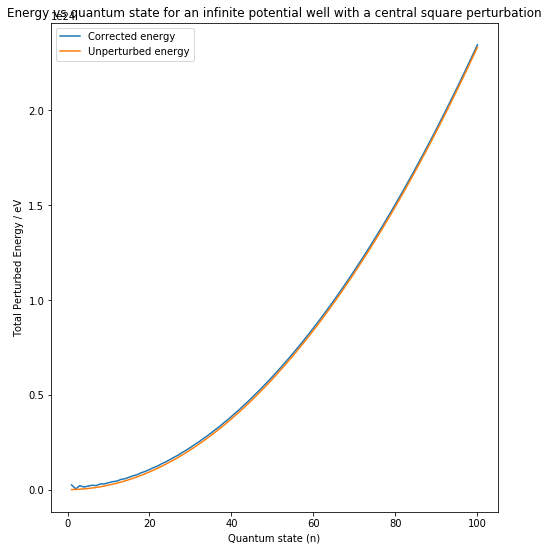

In [3]:
def energy_correc(n, V, w):
    """
    Function to calculate the total energy of the system with a square perturbation at the centre of an 
    infinite potential well
    
    Returns:
        new_E : float
                the corrected total energy
    Parameters:
        w : float
            width of the square perturbation
            
        V : float
               the square perturbation magnitude
               
        n : integer
            the principle quantum number
        """
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'psi' function which is previously defined
            """
            
            return V * abs(psi(n, x))**2
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        
        #the 'quad' function outputs a list with two elements - the integral and the estimated error in the integral.
        #we only want the first element of the list (the integral value)
        new_E = (energy(n) + perturb_1[0]) / e
    return new_E

def energy_correc_spectrum(nmax, V, w):
    """
    Function to find total perturbed energy of the system for various quantum states
    
    Returns:
        new_E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
               
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the square perturbation
    """
    new_E = np.empty(nmax)
    
    for i in range(0, nmax):
        new_E[i] = energy_correc(i + 1, V, w)
    
    return new_E

def plot_energy_correc(nmax, V, w):
    """
    Function to plot total perturbed energy against the quantum state alongside the unperturbed energy.
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
        
        V : float
            magnitude of the square perturbation in eV
               
        w : float
            width of the square perturbation
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
     
    #general plot formatting
    ax.plot(n, energy_correc_spectrum(nmax, V, w), label = 'Corrected energy')
    ax.plot(n, energy_spectrum(nmax), label = 'Unperturbed energy')
    ax.legend(loc = 'best')
    
    plt.xlabel('Quantum state (n)')
    plt.ylabel('Total Perturbed Energy / eV')
    plt.title('Energy vs quantum state for an infinite potential well with a central square perturbation')
    return plt.show()

plot_energy_correc(100, 10000, w)

As you can see, there is hardly a difference between the two energy spectrums for low perturbation magnitudes. This changes, however, as we increase the perturbation magnitude. It is important not to make the perturbation magnitude too great, particularly for lower quantum states, because perturbation theory will begin to break down. This is because we assumed that $\hat{H}^{'}$ was small in comparison to $\hat{H}_{0}$ when we derived equations for the first order correction to the energy.

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Energy-correction-for-different-states%0A"><i class="fa fa-pencil-square-o"></i> Energy correction for different states
</h3>
    <p>If you have made the perturbation very large, you may have seen that the energy appears to oscillate at low quantum numbers. Let's investigate this! Plot the first-order energy correction against the perturbation magnitude for different quantum states. Why does the gradient of the plot seem to oscillate for lower quantum states (think about the position of the perturbation and the probability distribution)?</p>
</div>

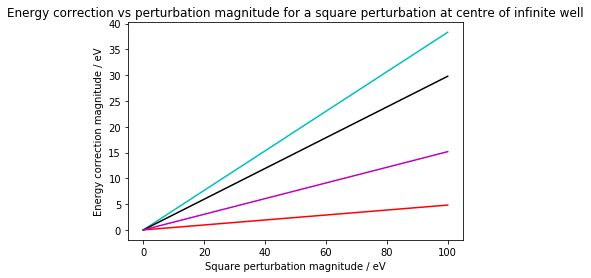

In [4]:
def firstperturb(n, V, w):
    """
    Function to calulate the first-order perturbation in the energy of a particle in the infinite potential well
    
    Returns:
        perturb_eV : float
                     the first order perturbation in eV
    
    Parameters:
        w : float
            the width of the square perturbation
            
        V : float
            the magnitude of the square perturbation
            
        n : integer
            the principal quantum number
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (np.sqrt(2 / L) * np.sin((n * np.pi * x) / L)) * (np.conj(np.sqrt(2 / L) * np.sin((n * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        
        #the 'quad' function has two outputs: the integral and the estimated error in the integral
        #we only want the first element of the list (the integral value)
        perturb_eV = perturb_1[0] / e #find the 1st order perturbation in eV
        return perturb_eV

def delta_E(n, Vmax, w):
    """
    Function to return the first order energy correction (in eV) for different square perturbation magnitudes
    
    Returns:
        delta : array
                contains the first order energy corrections over different square perturbation magnitudes
            
    Parameters:
        w : float
            width of the square perturbation
        
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        n : integer
            the principle quantum number
    """

    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    else: 
        delta = []
    
        for V in np.arange(0, Vmax, Vmax / 100):
            delta = np.append(delta, firstperturb(n, V, w))
    
        return delta
    
Vmax = 100 * e
delta_V = np.linspace(0, Vmax, 100)

plt.plot(delta_V / e, delta_E(1, Vmax, w), color = 'c')
plt.plot(delta_V / e, delta_E(2, Vmax, w), color = 'r')
plt.plot(delta_V / e, delta_E(3, Vmax, w), color = 'k')
plt.plot(delta_V / e, delta_E(4, Vmax, w), color = 'm')
plt.xlabel('Square perturbation magnitude / eV')
plt.ylabel('Energy correction magnitude / eV')
plt.title('Energy correction vs perturbation magnitude for a square perturbation at centre of infinite well')
plt.show()

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-points%3A%0A"><i class="fa fa-key"></i> Key points:
</h3>
    <ul>
<li>The energy of a complex system can be found by applying perturbation theory to a simpler but similar one.</li>
<li>Perturbation theory begins to break down when the perturbation becomes large in comparison to the energy of the unperturbed system.</li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./02_ipw_tdse.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./04_ipw_PT_psi.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>